In [ ]:
# This is the aws blog https://aws.amazon.com/blogs/aws/using-spatial-data-with-amazon-redshift/
# Download the dataset for accommodations and zip code

!mkdir -p ./data
!aws s3 cp 's3://redshift-downloads/spatial-data/accommodations.csv' './data/accommodations.csv'
!aws s3 cp 's3://redshift-downloads/spatial-data/zipcode.csv' './data/zipcode.csv'

In [1]:
!pip install geopandas
!pip install shapely
!pip install contextily mapclassify

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from shapely import wkb

In [3]:
fp_accommodate = './data/accommodations.csv'
fp_zipcode = './data/zipcode.csv'

In [4]:
df_acc = pd.read_csv(fp_accommodate,sep=';')
df_acc.head()

,id,shape,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,7071,0101000020E6100000CE823DD286D42A40DF415D2D8645...,BrightRoom with sunny greenview!,Bright,Pankow,Helmholtzplatz,Private room,42,2,197,2018-11-04,1.75,1,26
1,28268,0101000020E61000002780B1F59CF02A40D780769BB641...,Cozy Berlin Friedrichshain for1/6 p,Elena,Friedrichshain-Kreuzberg,Frankfurter Allee Sued FK,Entire home/apt,90,5,30,2017-08-02,0.33,1,55
2,42742,0101000020E6100000163B443574E12A40B0FE1CCD923F...,Spacious 35m2 in Central Apartment,Desiree,Friedrichshain-Kreuzberg,suedliche Luisenstadt,Private room,36,1,25,2018-10-01,0.32,2,217
3,57792,0101000020E610000029E507B1F7A72A40DB5F6F8D7036...,Bungalow mit Garten in Berlin Zehlendorf,Jo,Steglitz - Zehlendorf,Ostpreußendamm,Entire home/apt,49,2,3,2017-02-12,0.03,1,0
4,81081,0101000020E61000001269684E9FD42A40D3881DF25B46...,Beautiful Prenzlauer Berg Apt,Bernd+Katja :-),Pankow,Prenzlauer Berg Nord,Entire home/apt,66,3,238,2018-10-28,2.59,1,69


In [5]:
df_zip=pd.read_csv(fp_zipcode, sep=';')
df_zip.head()

,ogc_field,wkb_geometry,gml_id,spatial_name,spatial_alias,spatial_type
0,0,0103000020E6100000010000004B010000FCF457FB51BB...,re_postleit.10115,10115,10115,Polygon
1,4,0103000020E6100000010000004B0100005CBC8B2DD6C0...,re_postleit.10117,10117,10117,Polygon
2,16,0103000020E6100000010000000A01000051D9EA6F5DCE...,re_postleit.10179,10179,10179,Polygon
3,28,0103000020E610000001000000BD000000226EDBF3B1E7...,re_postleit.10247,10247,10247,Polygon
4,36,0103000020E61000000100000070010000812F82911707...,re_postleit.10315,10315,10315,Polygon


In [ ]:
# Well-known binary (WKB) format in the shape collumns
# print(len(df_acc['shape'][1]), df_acc['shape'][1])

# wkb.loads(df_acc['shape'][1], hex=True).wkt
# df_acc['geo_wkt'] = df_acc.apply(lambda x: wkb.loads(x['shape'], hex=True).wkt, axis=1)

In [6]:
df_acc['geometry']=df_acc.apply(lambda x: wkb.loads(x['shape'], hex=True), axis=1)

In [7]:
gdf = gpd.GeoDataFrame(df_acc, geometry=df_acc['geometry'], crs=4326)
gdf.head()

,id,shape,name,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,geometry
0,7071,0101000020E6100000CE823DD286D42A40DF415D2D8645...,BrightRoom with sunny greenview!,Bright,Pankow,Helmholtzplatz,Private room,42,2,197,2018-11-04,1.75,1,26,POINT (13.41509 52.54316)
1,28268,0101000020E61000002780B1F59CF02A40D780769BB641...,Cozy Berlin Friedrichshain for1/6 p,Elena,Friedrichshain-Kreuzberg,Frankfurter Allee Sued FK,Entire home/apt,90,5,30,2017-08-02,0.33,1,55,POINT (13.46995 52.51339)
2,42742,0101000020E6100000163B443574E12A40B0FE1CCD923F...,Spacious 35m2 in Central Apartment,Desiree,Friedrichshain-Kreuzberg,suedliche Luisenstadt,Private room,36,1,25,2018-10-01,0.32,2,217,POINT (13.44034 52.49667)
3,57792,0101000020E610000029E507B1F7A72A40DB5F6F8D7036...,Bungalow mit Garten in Berlin Zehlendorf,Jo,Steglitz - Zehlendorf,Ostpreußendamm,Entire home/apt,49,2,3,2017-02-12,0.03,1,0,POINT (13.32806 52.42531)
4,81081,0101000020E61000001269684E9FD42A40D3881DF25B46...,Beautiful Prenzlauer Berg Apt,Bernd+Katja :-),Pankow,Prenzlauer Berg Nord,Entire home/apt,66,3,238,2018-10-28,2.59,1,69,POINT (13.41528 52.54968)


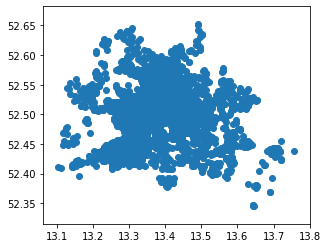

In [8]:
gdf.plot()

In [9]:
# must change from 4326 to 3857. Otherwise it will kernal dump when plot
gdf = gdf.to_crs(3857)

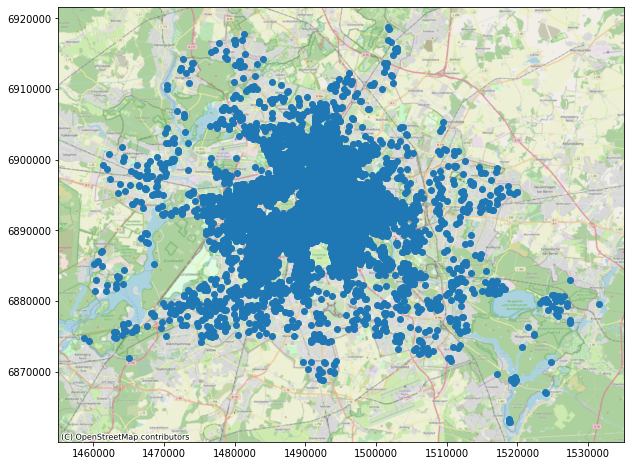

In [10]:
# cx.providers.OpenStreetMap.Mapnik
f, ax = plt.subplots(1, figsize=(12, 8))
gdf.plot(ax=ax)
cx.add_basemap(ax, crs=gdf.crs.to_string(), source=cx.providers.OpenStreetMap.Mapnik)
# ax.set_axis_off()
plt.show()